In [143]:
import numpy as np 
from sklearn.cluster import DBSCAN 
from sklearn import metrics 
from sklearn.datasets.samples_generator import make_blobs 
from sklearn.preprocessing import StandardScaler 


In [144]:
import re
# Note: dont change dbscan.txt locally
fin = open("dbscan.txt", "rt")
points = []

for line in fin:
    strs = line[9: len(line)-3]
    nums = strs.split(",")
    for i in range(0, len(nums)): 
        nums[i] = float(nums[i]) 
    points.append(nums)
    
fin.close()
print(points)


[[1.0, 5.0], [1.25, 5.35], [1.25, 5.75], [1.5, 6.25], [1.75, 6.75], [2.0, 6.5], [3.0, 7.75], [3.5, 8.25], [3.75, 8.75], [3.95, 9.1], [4.0, 8.5], [2.5, 7.25], [2.25, 7.75], [2.0, 6.5], [2.75, 8.25], [4.5, 8.9], [9.0, 5.0], [8.75, 5.85], [9.0, 6.25], [8.0, 7.0], [8.5, 6.25], [8.5, 6.75], [8.25, 7.65], [7.0, 8.25], [6.0, 8.75], [5.5, 8.25], [5.25, 8.75], [4.9, 8.75], [5.0, 8.5], [7.5, 7.75], [7.75, 8.25], [6.75, 8.0], [6.25, 8.25], [4.5, 8.9], [5.0, 1.0], [1.25, 4.65], [1.25, 4.25], [1.5, 3.75], [1.75, 3.25], [2.0, 3.5], [3.0, 2.25], [3.5, 1.75], [3.75, 8.75], [3.95, 0.9], [4.0, 1.5], [2.5, 2.75], [2.25, 2.25], [2.0, 3.5], [2.75, 1.75], [4.5, 1.1], [5.0, 9.0], [8.75, 5.15], [8.0, 2.25], [8.25, 3.0], [8.5, 4.75], [8.5, 4.25], [8.25, 3.35], [7.0, 1.75], [8.0, 3.5], [6.0, 1.25], [5.5, 1.75], [5.25, 1.25], [4.9, 1.25], [5.0, 1.5], [7.5, 2.25], [7.75, 2.75], [6.75, 2.0], [6.25, 1.75], [4.5, 1.1], [3.0, 4.5], [7.0, 4.5], [5.0, 3.0], [4.0, 3.35], [6.0, 3.35], [4.25, 3.25], [5.75, 3.25], [3.5, 3.

In [163]:
# Plot result 
import matplotlib.pyplot as plt 
def MY_DBSCAN(ep, min_sample):
    X = np.array(points) # convert to np nd array
    db = DBSCAN(eps=ep, min_samples=min_sample).fit(X) # now get the scan algorithm to work
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool) 
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_ 
    # Get the number of clusters in labels, we want to ignore noise if present. 
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

    unique_labels = set(labels) 
    for k, col in zip(unique_labels, colors): 
        if k == -1: 
            # Black used for noise. 
            col = 'k'

        class_member_mask = (labels == k) 

        xy = X[class_member_mask & core_samples_mask] 
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, 
                                          markeredgecolor='k',  
                                          markersize=6) 

        xy = X[class_member_mask & ~core_samples_mask] 
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, 
                                          markeredgecolor='k', 
                                          markersize=6) 

#     plt.title('number of clusters: %d' %n_clusters_) 
    plt.show()
    outlier_detection = DBSCAN(
      eps = ep,
      metric="euclidean",
      min_samples = min_sample,
      n_jobs = -1)
    clusters = outlier_detection.fit_predict(X)
    print(clusters) # to see outliers values: -1
    
    n_outliers = 0;
    for ele in clusters:
        if ele == -1:
            n_outliers += 1
    print(colors) 
    print('number of clusters: %d' %n_clusters_)
    print('number of outliers: %d' %n_outliers)
    

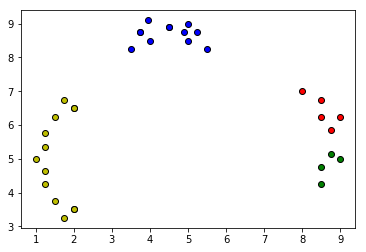

[ 0  0  0  0  0  0 -1  1  1  1  1 -1 -1  0 -1  1  2  3  3  3  3  3 -1  4
  4  1  1  1  1 -1 -1  4  4  1  5  0  0  0  0  0 -1 -1  1  5 -1 -1 -1  0
 -1  5  1  2  6  6  2  2  6  7  6  7  5  5  5  5  6  6  7  7  5  8  8  8
  8  8  8  8  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9  9 10 10 10
 10 10 10 10 -1 -1 -1]
['y', 'b', 'g', 'r']
number of clusters: 11
number of outliers: 16


In [171]:
MY_DBSCAN(0.6, 3)

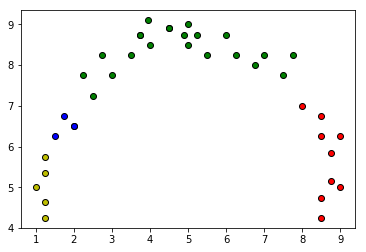

[ 0  0  0  1  1  1  2  2  2  2  2  2  2  1  2  2  3  3  3  3  3  3 -1  2
  2  2  2  2  2  2  2  2  2  2  4  0  0  5  5  5  4  4  2  4  4  4  4  5
  4  4  2  3  4  4  3  3  4  4  4  4  4  4  4  4  4  4  4  4  4  6  6  6
  6  6  6  6  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  8  8  8
  8  8  8  8 -1 -1 -1]
['y', 'b', 'g', 'r']
number of clusters: 9
number of outliers: 4


In [170]:
MY_DBSCAN(0.75, 4)

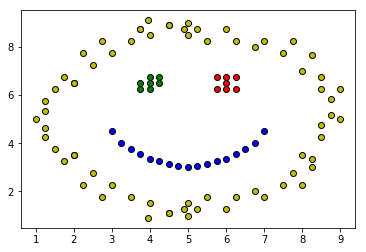

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  2  2  2  2  2  2  2  3  3  3
  3  3  3  3 -1 -1 -1]
['y', 'b', 'g', 'r']
number of clusters: 4
number of outliers: 3


In [169]:
MY_DBSCAN(1.0, 5)

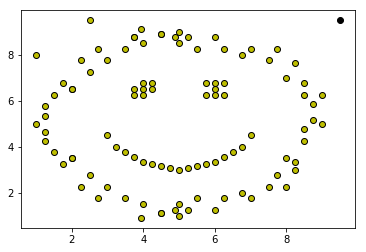

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0 -1  0  0]
['y', 'b', 'g', 'r']
number of clusters: 1
number of outliers: 1


In [168]:
MY_DBSCAN(2.0, 10)

In [ ]:
# source help: https://www.geeksforgeeks.org/dbscan-clustering-in-ml-density-based-clustering/